EDA Steps on fuel transactions

In [51]:
import pandas as pd
import numpy as np

# Load tab-delimited WEX file
df = pd.read_excel(
    "/Users/nakishaboulware/UNC-MADS_Python/DATA_992/WEX Transactions 02.02.24 - 02.02.26.xlsx",
    dtype=str,
    engine="openpyxl"
)


# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("/", "_")
    .str.replace("-", "_")
)



In [52]:
df.head()


,account_name,account_number,card_number,emboss_line_2,purchase_control_name,prompting,department,posted_date,transaction_date,transaction_time,...,l2_acct_nm,l3_acct_nm,l4_acct_nm,l5_acct_nm,l6_acct_nm,l7_acct_nm,l8_acct_nm,l9_acct_nm,rebate_name,rebate_code
0,Treasurer Office,0496005789722,****96157,240130,NC MF Custom Control FUEL,Odometer & Driver ID,Unassigned,2024-02-06 00:00:00,2024-02-02 00:00:00,09:27:00,...,State of NC Motor Fleet,Department Of The State Treasurer,Treasurer Office,,,,,,NaN,NaN
1,Treasurer Office,0496005789722,****85994,263483,NC MF Custom Control FUEL,Odometer & Driver ID,Unassigned,2024-02-09 00:00:00,2024-02-07 00:00:00,10:12:00,...,State of NC Motor Fleet,Department Of The State Treasurer,Treasurer Office,,,,,,NaN,NaN
2,Treasurer Office,0496005789722,****96157,240130,NC MF Custom Control FUEL,Odometer & Driver ID,Unassigned,2024-03-06 00:00:00,2024-03-04 00:00:00,09:36:00,...,State of NC Motor Fleet,Department Of The State Treasurer,Treasurer Office,,,,,,NaN,NaN
3,Treasurer Office,0496005789722,****85994,263483,NC MF Custom Control FUEL,Odometer & Driver ID,Unassigned,2024-04-18 00:00:00,2024-04-16 00:00:00,11:45:00,...,State of NC Motor Fleet,Department Of The State Treasurer,Treasurer Office,,,,,,NaN,NaN
4,Treasurer Office,0496005789722,****96157,240130,NC MF Custom Control FUEL,Odometer & Driver ID,Unassigned,2024-04-09 00:00:00,2024-04-05 00:00:00,09:31:00,...,State of NC Motor Fleet,Department Of The State Treasurer,Treasurer Office,,,,,,NaN,NaN


Convert data types

In [7]:
# Date columns
date_cols = [
    "posted_date", "transaction_date", "license_plate_expiration_date",
    "in_service_date", "driver_license_expiration_date",
    "transaction_status_date"
]

for c in date_cols:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce")

# Time column
if "transaction_time" in df.columns:
    df["transaction_time"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S", errors="coerce").dt.time

# Numeric columns
numeric_cols = [
    "units", "unit_cost", "total_fuel_cost", "service_cost", "other_cost",
    "total_non_fuel_cost", "gross_cost", "exempt_tax", "discount", "net_cost",
    "reported_tax", "total_memo_fuel_amount", "total_memo_non_fuel_amount",
    "transaction_fee_amount_1", "transaction_fee_amount_2",
    "transaction_fee_amount_3", "transaction_fee_amount_4",
    "transaction_fee_amount_5", "start_odometer", "current_odometer",
    "adjusted_odometer", "previous_odometer", "distance_driven",
    "fuel_economy", "cost_per_distance", "tank_capacity"
]

for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")


/var/folders/1m/jknp1cps1h55g42v_msfp9jw0000gn/T/ipykernel_4404/3691008569.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = pd.to_datetime(df[c], errors="coerce")
/var/folders/1m/jknp1cps1h55g42v_msfp9jw0000gn/T/ipykernel_4404/3691008569.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = pd.to_datetime(df[c], errors="coerce")


Find missing and check structure

In [53]:
missing_summary = (
    df.isna().sum()
    .to_frame("missing_count")
    .assign(missing_pct=lambda x: x["missing_count"] / len(df) * 100)
    .sort_values("missing_pct", ascending=False)
)

missing_summary.head(20)


,missing_count,missing_pct
rebate_code,587180,100.000000
rebate_name,587180,100.000000
driver_prompt_id,587180,100.000000
notes,587180,100.000000
transaction_status_date,587180,100.000000
transaction_status_username,587180,100.000000
transaction_status,587180,100.000000
transaction_fee_amount_5,587179,99.999830
transaction_fee_type_1,587179,99.999830
transaction_fee_type_2,587179,99.999830


In [54]:
#duplicate data
duplicate_rows = df[df.duplicated()]
duplicate_rows.head()


,account_name,account_number,card_number,emboss_line_2,purchase_control_name,prompting,department,posted_date,transaction_date,transaction_time,...,l2_acct_nm,l3_acct_nm,l4_acct_nm,l5_acct_nm,l6_acct_nm,l7_acct_nm,l8_acct_nm,l9_acct_nm,rebate_name,rebate_code


In [55]:
# fuel types and counts

df["product"].str.upper().str.strip().value_counts(dropna=False)


product
UNL     556406
UN+       6863
WASH      5812
ETH       4958
SUP       4901
DISC      2879
FUL       1502
E-85       950
DSL        842
OTH        560
COUP       462
E15        438
EVC2       245
EVC3        99
OFUL        71
DEF         59
DS+         47
SUB         34
FRM         10
SAL          9
UNB          7
U+C          5
UNC          4
BEV          4
SUC          4
DIS          3
MISC         3
MOT          1
MER          1
LP           1
Name: count, dtype: int64

Business Rule Validations

In [56]:
#FUEL

fuel_map = {
    # Unleaded variants
    "UNL": "UNLEADED",
    "UN+": "UNLEADED_PLUS",
    "UNB": "UNLEADED",
    "U+C": "UNLEADED",
    "UNC": "UNLEADED",
    "SUP": "PREMIUM",
    "SUC": "PREMIUM",

    # Diesel variants
    "DSL": "DIESEL",
    "DS+": "DIESEL_PLUS",
    "OFUL": "DIESEL",   # pending confirmation
    "DEF": "DISEL_EXHAUST_FLUID",       # diesel exhaust fluid (own category)

    # Ethanol blends
    "ETH": "ETHANOL",
    "E15": "E15",
    "E-85": "E85",

    # Electric charging
    "EVC2": "EV_CHARGE_LEVEL_2",
    "EVC3": "EV_CHARGE_LEVEL_3",
    "BEV": "ELECTRIC",

    # Non-fuel items
    "WASH": "NON_FUEL",
    "COUP": "NON_FUEL",
    "DISC": "NON_FUEL",
    "DIS": "NON_FUEL",
    "SAL": "NON_FUEL",
    "MISC": "NON_FUEL",
    "MER": "NON_FUEL",
    "FRM": "NON_FUEL",
    "MOT": "NON_FUEL",
    "LP": "NON_FUEL",   # pending confirmation

    # Ambiguous → UNKNOWN
    "FUL": "UNKNOWN",
    "OTH": "UNKNOWN",
    "SUB": "UNKNOWN",
}

df["fuel_type"] = (
    df["product"]
    .str.upper()
    .str.strip()
    .replace(fuel_map)
)

In [57]:
#create a fuel category

df["fuel_category"] = df["fuel_type"].map({
    "UNLEADED": "FUEL",
    "UNLEADED_PLUS": "FUEL",
    "PREMIUM": "FUEL",
    "DIESEL": "FUEL",
    "DIESEL_PLUS": "FUEL",
    "ETHANOL": "FUEL",
    "E15": "FUEL",
    "E85": "FUEL",
    "ELECTRIC": "FUEL",
    "EV_CHARGE_LEVEL_2": "FUEL",
    "EV_CHARGE_LEVEL_3": "FUEL",

    "DISEL_EXHAUST_FLUID": "DISEL_EXHAUST_FLUID",              # its own top-level category
    "NON_FUEL": "NON_FUEL",
    "UNKNOWN": "UNKNOWN"
})


Clarification questions before finalizing the mapping
These matter for business‑rule accuracy:
FUL — Does WEX documentation define this? Is it “Full Service Fuel”?
OFUL — Is this “Off‑Road Fuel”? Should it be treated as diesel?
LP — Is this propane? Lubricant? Should it be NON_FUEL or a separate category?
SUB — What does this represent in your agency’s WEX setup?
OTH — Should “Other” be treated as NON_FUEL or UNKNOWN?

Adjusted odometer is missing quite a bit


In [58]:
#check counts

df["fuel_type"].value_counts(dropna=False)

fuel_type
UNLEADED               556422
NON_FUEL                 9181
UNLEADED_PLUS            6863
ETHANOL                  4958
PREMIUM                  4905
UNKNOWN                  2096
E85                       950
DIESEL                    913
E15                       438
EV_CHARGE_LEVEL_2         245
EV_CHARGE_LEVEL_3          99
DISEL_EXHAUST_FLUID        59
DIESEL_PLUS                47
ELECTRIC                    4
Name: count, dtype: int64

In [59]:
#check categories

df["fuel_category"].value_counts(dropna=False)

fuel_category
FUEL                   575844
NON_FUEL                 9181
UNKNOWN                  2096
DISEL_EXHAUST_FLUID        59
Name: count, dtype: int64

In [60]:
#crosstab to check fuel dictionary 

pd.crosstab(df["fuel_type"], df["fuel_category"])

fuel_category,DISEL_EXHAUST_FLUID,FUEL,NON_FUEL,UNKNOWN
fuel_type,,,,
DIESEL,0,913,0,0
DIESEL_PLUS,0,47,0,0
DISEL_EXHAUST_FLUID,59,0,0,0
E15,0,438,0,0
E85,0,950,0,0
ELECTRIC,0,4,0,0
ETHANOL,0,4958,0,0
EV_CHARGE_LEVEL_2,0,245,0,0
EV_CHARGE_LEVEL_3,0,99,0,0


In [61]:
df.groupby(["product", "fuel_type", "fuel_category"]).size().sort_values(ascending=False)

product  fuel_type            fuel_category      
UNL      UNLEADED             FUEL                   556406
UN+      UNLEADED_PLUS        FUEL                     6863
WASH     NON_FUEL             NON_FUEL                 5812
ETH      ETHANOL              FUEL                     4958
SUP      PREMIUM              FUEL                     4901
DISC     NON_FUEL             NON_FUEL                 2879
FUL      UNKNOWN              UNKNOWN                  1502
E-85     E85                  FUEL                      950
DSL      DIESEL               FUEL                      842
OTH      UNKNOWN              UNKNOWN                   560
COUP     NON_FUEL             NON_FUEL                  462
E15      E15                  FUEL                      438
EVC2     EV_CHARGE_LEVEL_2    FUEL                      245
EVC3     EV_CHARGE_LEVEL_3    FUEL                       99
OFUL     DIESEL               FUEL                       71
DEF      DISEL_EXHAUST_FLUID  DISEL_EXHAUST_FLUID 

In [62]:
#ODOMETER LOGIC CHECKS

#adjusted odometer is missing in quite a few

#view data first 5 rows
df = df.sort_values(["custom_vehicle_asset_id", "transaction_date"])

df[["custom_vehicle_asset_id","start_odometer","previous_odometer", "adjusted_odometer",  "current_odometer", "distance_driven"]].head()

,custom_vehicle_asset_id,start_odometer,previous_odometer,adjusted_odometer,current_odometer,distance_driven
209943,123456,0,13598,13630,975857,32
209941,123456,0,13630,13664,7181,34
209942,123456,0,13664,13687,26107,23
209954,123456,0,13687,13698,268807,11
209955,123456,0,268807,268870,27118,63


In [93]:
#conver to numeric 
df["adjusted_odometer"] = pd.to_numeric(df["adjusted_odometer"], errors="coerce")
df["previous_odometer"] = pd.to_numeric(df["previous_odometer"], errors="coerce")
df["current_odometer"] = pd.to_numeric(df["current_odometer"], errors="coerce")

# missing-data flags
df["adjusted_odometer_missing"] = df["adjusted_odometer"].isna()
df["previous_odometer_missing"] = df["previous_odometer"].isna()
df["current_odometer_missing"] = df["current_odometer"].isna()

#Effective odometer (fallback)
df["effective_odometer"] = df["adjusted_odometer"].fillna(df["current_odometer"])
df["effective_previous"] = df["previous_odometer"]

#Odometer difference
df["odometer_diff"] = df["effective_odometer"] - df["effective_previous"]

# If either value is missing, set diff to NaN
df.loc[
    df["effective_odometer"].isna() | df["effective_previous"].isna(),
    "odometer_diff"
] = np.nan

# Integrity flags
df["odometer_backwards_flag"] = df["odometer_diff"] < 0
df["odometer_jump_flag"] = df["odometer_diff"] > 1000

df["odometer_mismatch_flag"] = (
    df["current_odometer"].notna() &
    df["adjusted_odometer"].notna() &
    (abs(df["current_odometer"] - df["adjusted_odometer"]) > 50)
)

df["odometer_missing_flag"] = (
    df["adjusted_odometer_missing"] |
    df["previous_odometer_missing"] |
    df["current_odometer_missing"]
)

#consolidated anomly flag
df["odometer_anomaly_flag"] = (
    df["odometer_backwards_flag"] |
    df["odometer_jump_flag"] |
    df["odometer_mismatch_flag"] |
    df["odometer_missing_flag"]
)

In [94]:
#odometer anomaly flags

df = df.sort_values(["custom_vehicle_asset_id", "transaction_date"])

df[["custom_vehicle_asset_id", "previous_odometer", "adjusted_odometer", "current_odometer","odometer_diff",
    "odometer_backwards_flag", "odometer_jump_flag",  "odometer_mismatch_flag", "odometer_anomaly_flag"]].head()


,custom_vehicle_asset_id,previous_odometer,adjusted_odometer,current_odometer,odometer_diff,odometer_backwards_flag,odometer_jump_flag,odometer_mismatch_flag,odometer_anomaly_flag
209943,123456,13598.0,13630.0,975857,32.0,False,False,True,True
209941,123456,13630.0,13664.0,7181,34.0,False,False,True,True
209942,123456,13664.0,13687.0,26107,23.0,False,False,True,True
209954,123456,13687.0,13698.0,268807,11.0,False,False,True,True
209955,123456,268807.0,268870.0,27118,63.0,False,False,True,True


In [95]:
#counts of odometer flags

flag_cols = ["odometer_backwards_flag","odometer_jump_flag",
             "odometer_mismatch_flag","odometer_anomaly_flag"]

flag_summary = df[flag_cols].apply(lambda x: x.value_counts()).fillna(0)
flag_summary


,odometer_backwards_flag,odometer_jump_flag,odometer_mismatch_flag,odometer_anomaly_flag
False,586062,585274,460022,23307
True,1118,1906,127158,563873


In [96]:
#TANK CAPACITY

# Convert to numeric
df["units"] = pd.to_numeric(df["units"], errors="coerce")
df["tank_capacity"] = pd.to_numeric(df["tank_capacity"], errors="coerce")

#invalid tank capacity
df["tank_capacity_invalid"] = df["tank_capacity"].isna() | (df["tank_capacity"] <= 0)

# Overfill flag
df["over_tank_flag"] = ((df["tank_capacity"] > 0) & (df["units"] > df["tank_capacity"]))

# How much over (gallons)
df["over_tank_amount"] = np.where(df["over_tank_flag"],df["units"] - df["tank_capacity"], 0)

#drop invalids
df["tank_capacity_invalid"].value_counts(dropna=False)

#count true overfills
df["over_tank_flag"].value_counts(dropna=False)

#overfills describe
df.loc[df["over_tank_flag"], "over_tank_amount"].describe()

#drops invalids
df.loc[df["tank_capacity_invalid"], ["custom_vehicle_asset_id", "tank_capacity"]].drop_duplicates()

overfill_counts = df["over_tank_flag"].value_counts(dropna=False)
overfill_counts


over_tank_flag
False    580883
True       6297
Name: count, dtype: int64

In [84]:
vehicle_overfill = (
    df.loc[df["over_tank_flag"], ["custom_vehicle_asset_id", "units", "tank_capacity", "over_tank_amount"]]
      .sort_values("over_tank_amount", ascending=False)
)
vehicle_overfill.head(20)


,custom_vehicle_asset_id,units,tank_capacity,over_tank_amount
578293,267955,76.41,0,76.41
242024,267986,64.78,0,64.78
538768,268021,63.76,0,63.76
558650,267991,63.14,0,63.14
538786,268021,60.24,0,60.24
578292,267955,58.79,0,58.79
538785,268021,56.95,0,56.95
538770,268022,56.80,0,56.80
334428,267995,55.95,0,55.95
334434,267995,55.78,0,55.78


In [86]:
overfill_summary = df.loc[df["over_tank_flag"], "over_tank_amount"].describe()
overfill_summary

count    6946.000000
mean        2.823077
std         6.953759
min         0.010000
25%         0.350000
50%         0.800000
75%         1.640000
max        76.410000
Name: over_tank_amount, dtype: float64

In [97]:
overfill_summary = df.loc[df["over_tank_flag"], "over_tank_amount"].describe()
overfill_summary


count    6297.000000
mean        1.218639
std         2.186529
min         0.010000
25%         0.320000
50%         0.700000
75%         1.300000
max        33.140000
Name: over_tank_amount, dtype: float64

In [79]:
#PRICE PER GALLON

# Convert to numeric
df["unit_cost"] = pd.to_numeric(df["unit_cost"], errors="coerce")

# Separate low and high outliers
df["unit_cost_low_flag"] = df["unit_cost"] < 1
df["unit_cost_high_flag"] = df["unit_cost"] > 7

# Combined outlier flag
df["unit_cost_outlier"] = df["unit_cost_low_flag"] | df["unit_cost_high_flag"]

# --- VALUE COUNTS ---
low_counts = df["unit_cost_low_flag"].value_counts(dropna=False)
high_counts = df["unit_cost_high_flag"].value_counts(dropna=False)
outlier_counts = df["unit_cost_outlier"].value_counts(dropna=False)

# --- DISTRIBUTION SUMMARIES ---
low_summary = df.loc[df["unit_cost_low_flag"], "unit_cost"].describe()
high_summary = df.loc[df["unit_cost_high_flag"], "unit_cost"].describe()

low_counts, high_counts, outlier_counts, low_summary, high_summary


(unit_cost_low_flag
 False    583452
 True       3728
 Name: count, dtype: int64,
 unit_cost_high_flag
 False    581361
 True       5819
 Name: count, dtype: int64,
 unit_cost_outlier
 False    577633
 True       9547
 Name: count, dtype: int64,
 count    3728.000000
 mean       -0.914973
 std         1.044666
 min       -17.210000
 25%        -1.360000
 50%        -0.770000
 75%        -0.400000
 max         0.960000
 Name: unit_cost, dtype: float64,
 count     5819.000000
 mean        13.886776
 std        156.115586
 min          7.490000
 25%          9.000000
 50%         10.000000
 75%         14.000000
 max      11916.670000
 Name: unit_cost, dtype: float64)

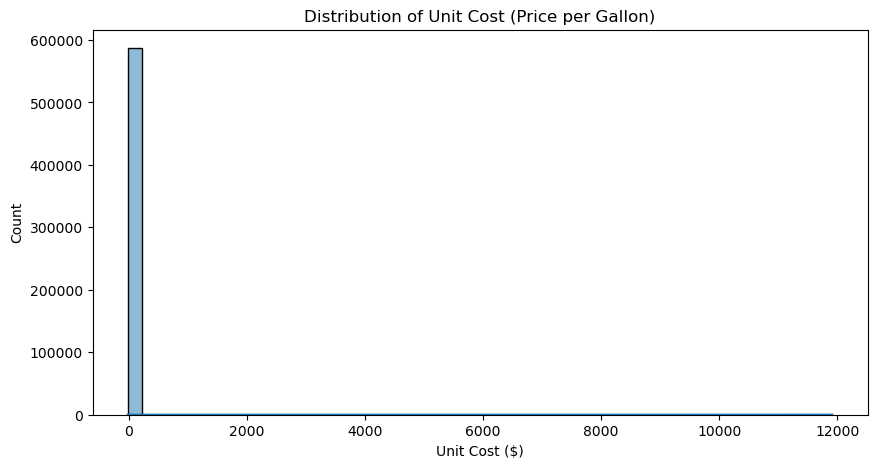

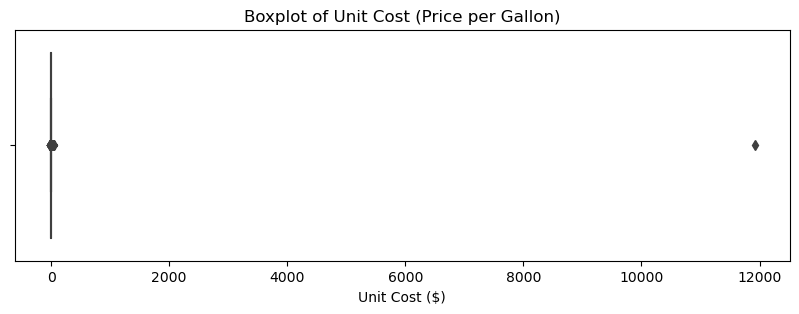

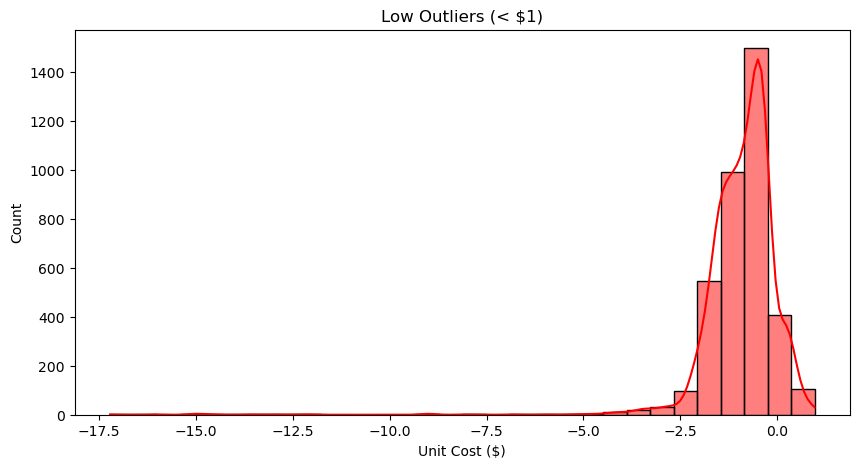

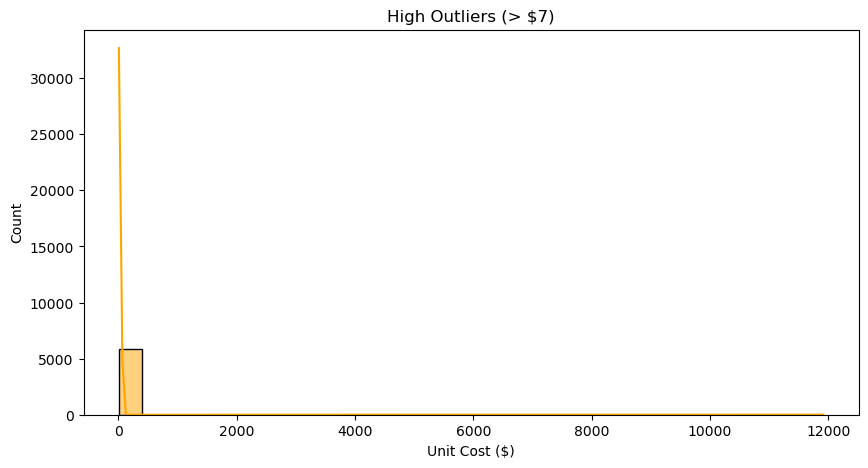

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- HISTOGRAM OF ALL UNIT COSTS ---
plt.figure(figsize=(10,5))
sns.histplot(df["unit_cost"], bins=50, kde=True)
plt.title("Distribution of Unit Cost (Price per Gallon)")
plt.xlabel("Unit Cost ($)")
plt.ylabel("Count")
plt.show()

# --- BOX PLOT TO SEE OUTLIERS CLEARLY ---
plt.figure(figsize=(10,3))
sns.boxplot(x=df["unit_cost"])
plt.title("Boxplot of Unit Cost (Price per Gallon)")
plt.xlabel("Unit Cost ($)")
plt.show()

# --- HISTOGRAM OF LOW OUTLIERS ---
plt.figure(figsize=(10,5))
sns.histplot(df.loc[df["unit_cost_low_flag"], "unit_cost"], bins=30, kde=True, color="red")
plt.title("Low Outliers (< $1)")
plt.xlabel("Unit Cost ($)")
plt.ylabel("Count")
plt.show()

# --- HISTOGRAM OF HIGH OUTLIERS ---
plt.figure(figsize=(10,5))
sns.histplot(df.loc[df["unit_cost_high_flag"], "unit_cost"], bins=30, kde=True, color="orange")
plt.title("High Outliers (> $7)")
plt.xlabel("Unit Cost ($)")
plt.ylabel("Count")
plt.show()


In [78]:
#SUSPICIOUS TRANSACTIONS

# Convert string columns to numeric 
df["gross_cost"] = pd.to_numeric(df["gross_cost"], errors='coerce')
df["units"] = pd.to_numeric(df["units"], errors='coerce')

# Create the flags
df["zero_cost_flag"] = df["gross_cost"] == 0
df["zero_units_flag"] = df["units"] == 0
df["high_units_flag"] = df["units"] > 25
df["high_cost_flag"] = df["gross_cost"] > 150

# Summarize counts for each flag
usage_flag_cols = ["zero_cost_flag", "zero_units_flag", "high_units_flag", "high_cost_flag"]

usage_flag_summary = df[usage_flag_cols].apply(lambda x: x.value_counts()).fillna(0)
usage_flag_summary

,zero_cost_flag,zero_units_flag,high_units_flag,high_cost_flag
False,587180.0,587166,581244,587112
True,0.0,14,5936,68


In [98]:
#MERCHANT QUALITY CHECKS
df["merchant_phone_invalid"] = df["merchant_phone"].isin(["9999999999", "0", ""])
df["merchant_siteid_invalid"] = df["merchant_site_id"].isin(["000000", "0", ""])


In [ ]:
#DATE AND TIME CONSISTENCY

df["date_out_of_range"] = (
    (df["transaction_date"] < pd.Timestamp("2022-01-01")) |
    (df["transaction_date"] > pd.Timestamp("2026-12-31"))
)
